# IT41 Practical Session #4  - First Quantum Algorithms

---



In this last practical session you will run on quantum machine your first quantum algorithms by implementing the algorithms seen in class.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/quantum_computer.jpeg'  width="300px" />    
    </tr>
</table>


---
## Get ready
As usual one first  import MPQP and the vizualisation tools
```Python
from mpqp import* 
from mpqp.gates import*
from mpqp.measures import BasisMeasure
```
And as well we load the library for the executions:

```Python
from mpqp.execution import*
```
   

In [43]:
from mpqp import* 
from mpqp.gates import*
from mpqp.measures import BasisMeasure

from mpqp.execution import*

### Create an oracle

We have seen in class that it is always possible to implement a classical function with a quantum computer. Here we are going to implement classical functions usefull to run the Deutsch and Deutsch-Josza algorithm.

Consider the following circuit:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_balanced1.svg'  width="300px" />    
    </tr>
</table>

Implement this circuit and check that it corresponds to a unitary gate $U_f$ such that $U_f|x_0x_1x_2>|y>=|x_0x_1x_2>|y\oplus f(x_0,x_1,x_2)>$ where $f$ is a boolean function that satisfies:


|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$000$ |$111$|
|$011$ |$100$|
|$101$ |$010$|
|$110$ |$001$|

### input: $|0000\rangle$ expected output for $q_3$: $|0\rangle$

In [44]:
circ = QCircuit([CNOT(0, 3), CNOT(1, 3), CNOT(2, 3), BasisMeasure([3])])

result = run(circ, IBMDevice.AER_SIMULATOR)

print(circ)
print(result)

                       
q_0: ──■───────────────
       │               
q_1: ──┼────■──────────
       │    │          
q_2: ──┼────┼────■─────
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┐
q_3: ┤ X ├┤ X ├┤ X ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [1024, 0]
  Probabilities: [1, 0]
  Samples:
    State: 0000, Index: 0, Count: 1024, Probability: 1
  Error: None


### input: $|0110\rangle$ expected output for $q_3$: $|0\rangle$

In [45]:
circ = QCircuit(4)
circ.add(X(1))
circ.add(X(2))
circ.add(CNOT(0, 3))
circ.add(CNOT(1, 3))
circ.add(CNOT(2, 3))
circ.add(BasisMeasure([3]))


result = run(circ, IBMDevice.AER_SIMULATOR)

print(circ)
print(result)

                            
q_0: ───────■───────────────
     ┌───┐  │               
q_1: ┤ X ├──┼────■──────────
     ├───┤  │    │          
q_2: ┤ X ├──┼────┼────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┐
q_3: ─────┤ X ├┤ X ├┤ X ├┤M├
          └───┘└───┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [1024, 0]
  Probabilities: [1, 0]
  Samples:
    State: 0000, Index: 0, Count: 1024, Probability: 1
  Error: None


### input: $|1110\rangle$ expected output for $q_3$: $|1\rangle$

In [46]:
circ = QCircuit(4)
circ.add(X(0))
circ.add(X(1))
circ.add(X(2))
circ.add(CNOT(0, 3))
circ.add(CNOT(1, 3))
circ.add(CNOT(2, 3))
circ.add(BasisMeasure([3]))


result = run(circ, IBMDevice.AER_SIMULATOR)

print(circ)
print(result)

     ┌───┐                  
q_0: ┤ X ├──■───────────────
     ├───┤  │               
q_1: ┤ X ├──┼────■──────────
     ├───┤  │    │          
q_2: ┤ X ├──┼────┼────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┐
q_3: ─────┤ X ├┤ X ├┤ X ├┤M├
          └───┘└───┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 1024]
  Probabilities: [0, 1]
  Samples:
    State: 0001, Index: 1, Count: 1024, Probability: 1
  Error: None


### input: $|0010\rangle$ expected output for $q_3$: $|1\rangle$

In [47]:
circ = QCircuit(4)
circ.add(X(2))
circ.add(CNOT(0, 3))
circ.add(CNOT(1, 3))
circ.add(CNOT(2, 3))
circ.add(BasisMeasure([3]))


result = run(circ, IBMDevice.AER_SIMULATOR)

print(circ)
print(result)

                            
q_0: ───────■───────────────
            │               
q_1: ───────┼────■──────────
     ┌───┐  │    │          
q_2: ┤ X ├──┼────┼────■─────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┐
q_3: ─────┤ X ├┤ X ├┤ X ├┤M├
          └───┘└───┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 1024]
  Probabilities: [0, 1]
  Samples:
    State: 0001, Index: 1, Count: 1024, Probability: 1
  Error: None


Modify the previous circuit to create an other oracle $U_f$ that is defined by

|$f(x_0,x_1,x_2)=0$| $f(x_0,x_1,x_2)=1$|
|---|---|
|$010$ |$101$|
|$011$ |$100$|
|$111$ |$000$|
|$110$ |$001$|

### input: $|0000\rangle$ expected output for $q_3$: $|1\rangle$

In [48]:
circ2 = QCircuit(4)
circ2.add(X(3))
circ2.add(CNOT(1, 3))
circ2.add(BasisMeasure([3]))

result2 = run(circ2, IBMDevice.AER_SIMULATOR)

print(circ2)
print(result2)

                  
q_0: ─────────────
                  
q_1: ───────■─────
            │     
q_2: ───────┼─────
     ┌───┐┌─┴─┐┌─┐
q_3: ┤ X ├┤ X ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 1024]
  Probabilities: [0, 1]
  Samples:
    State: 0001, Index: 1, Count: 1024, Probability: 1
  Error: None


### input: $|1110\rangle$ expected output for $q_3$: $|0\rangle$

In [49]:
circ2 = QCircuit(4)

# INPUT
circ2.add(X(0))
circ2.add(X(1))
circ2.add(X(2))


# ORACLE
circ2.add(X(3))
circ2.add(CNOT(1, 3))

# Measurement
circ2.add(BasisMeasure([3]))
result2 = run(circ2, IBMDevice.AER_SIMULATOR)

print(circ2)
print(result2)

     ┌───┐        
q_0: ┤ X ├────────
     ├───┤        
q_1: ┤ X ├──■─────
     ├───┤  │     
q_2: ┤ X ├──┼─────
     ├───┤┌─┴─┐┌─┐
q_3: ┤ X ├┤ X ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [1024, 0]
  Probabilities: [1, 0]
  Samples:
    State: 0000, Index: 0, Count: 1024, Probability: 1
  Error: None


What would be an oracle for a constant function $f(x_0,\dots,x_n)=k$ with $k\in\{0,1\}$ ?

In [50]:
# Let's say n = 5
# we want to compute the following constant function f(x0,...,x5) = 1
# We have 6 input states
# We have a 7th qubit that we will use to measure
# No matter what we put as an input in q_0...q_5 : q_6 will be 1

const_oracle = QCircuit(7)
const_oracle.add(X(6)) # remove this to compute f(x0,...,x5) = 0
const_oracle.add(BasisMeasure([6]))


const_result = run(const_oracle, IBMDevice.AER_SIMULATOR)

print(const_oracle)
print(const_result)

# For f(x0,...,x5) = 0, we would simply remove the X gate

             
q_0: ────────
             
q_1: ────────
             
q_2: ────────
             
q_3: ────────
             
q_4: ────────
             
q_5: ────────
     ┌───┐┌─┐
q_6: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 1024]
  Probabilities: [0, 1]
  Samples:
    State: 0000001, Index: 1, Count: 1024, Probability: 1
  Error: None


---------

## Deutsch-Josza

Recall the circuit of the Deutsch-Josza algorithm that generalizes Deutsch algorithm

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/deutsch_steps.png'  width="400px" />    
    </tr>
</table>

Define a constant oracle $U_{f_1}$ and a balanced oracle $U_{f_2}$ of your choice and check on your example the validity of Deutsch-Josza's algorithm.

classmethod from_other_language(qcircuit)[source]

Testing the tensor product: `@`

In [51]:
circuit = QCircuit(1)
ancilla = QCircuit(1)

circuit.add(H(0))
circuit.add(X(0))

print(circuit)
print('----------')
circuit @= ancilla
circuit.add(CNOT(0, 1))
print(circuit)

   ┌───┐┌───┐
q: ┤ H ├┤ X ├
   └───┘└───┘
----------
     ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘


In [52]:
def Uf1(circuit): # constant oracle
    return circuit 

def Uf2(circuit): # balanced oracle (odd number of 1 => 1 else 0 using XOR with CNOTs)
    n_qubits = circuit.nb_qubits - 1
    for i in range(n_qubits):
        circuit.add(CNOT(i, n_qubits))
    return circuit


      
 q_0: 
      
 q_1: 
      
 q_2: 
      
 q_3: 
      
 q_4: 
      
 q_5: 
      
 q_6: 
      
 q_7: 
      
 q_8: 
      
 q_9: 
      
q_10: 
      


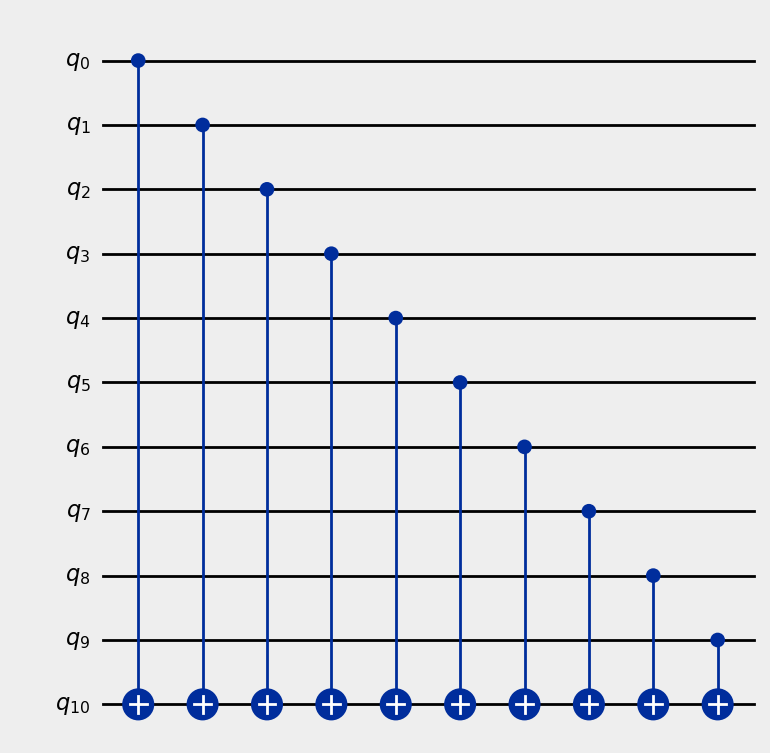

In [53]:
n = 10
test = QCircuit(n+1)  

Uf1(test).display()
print(Uf1(test))
Uf2(test).display()

#### Deutsch-Jozsa with the constant function `Uf1` with n = 2 and 1 ancilla => Expected output: $|000\rangle$

Result: IBMDevice, AER_SIMULATOR
  Counts: [1024, 0, 0, 0]
  Probabilities: [1, 0, 0, 0]
  Samples:
    State: 000, Index: 0, Count: 1024, Probability: 1
  Error: None


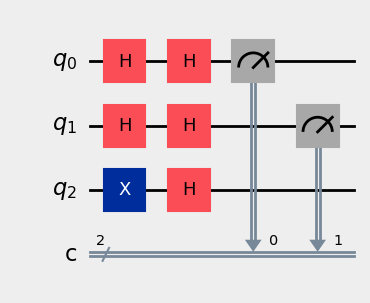

In [54]:
# n = 2
d_j = QCircuit(3)
d_j.add([H(0), H(1), X(2), H(2)])
d_j = Uf1(d_j)
d_j.add([H(0), H(1)])
d_j.add(BasisMeasure([0, 1]))

res = run(d_j, IBMDevice.AER_SIMULATOR)


print(res)
d_j.display()

#### Deutsch-Jozsa with the balanced function `Uf2` with n = 2 and 1 ancilla => Expected output: $ \neq |000\rangle$

Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 0, 0, 1024]
  Probabilities: [0, 0, 0, 1]
  Samples:
    State: 011, Index: 3, Count: 1024, Probability: 1
  Error: None


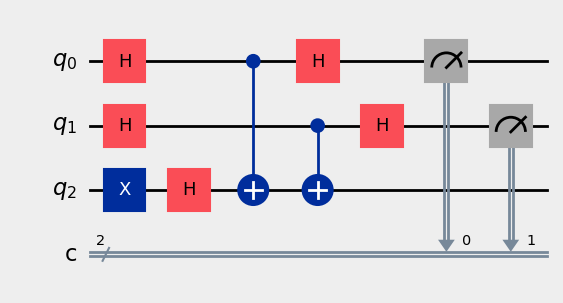

In [55]:
n = 2
d_j = QCircuit(n+1)
d_j.add([H(0), H(1), X(2), H(2)])
d_j = Uf2(d_j)
d_j.add([H(0), H(1)])
d_j.add(BasisMeasure([0, 1]))

res = run(d_j, IBMDevice.AER_SIMULATOR)


print(res)
d_j.display()

-------

## Bernstein-Vazirani

Bernstein-Vazirani algorithm is an algorithm that solve the following problem:
Let $u=u_{n-1}\dots u_0\in \{0,1\}^n$ an unknown $n$-bits string. Suppose you have a classical function $f:\{0,1\}^n\to \{0,1\}$ which calculates $f_u(x)=x.u [2]$ where $x.u$ is the usual inner product between $n$-bits strings, i.e. $x=x_{n-1}\dots x_0$ and $$x.u=x_0u_0+x_1u_1+\dots+x_{n-1}u_{n-1}$$

The goal of Bernstein-Vazirani's algorithm is to find $u$.

Recall that classically you can find $u$ by testing $n$ values $x\in \{0,1\}^n$. Bernstein-Vazirani's algorithm solves the problem by using only once the function $f$.

### Implementing the function $f_u$

Show that the following circuit implements on the function $f_u$ with $u=1101$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vaziraniu.png'  width="330px" />    
    </tr>
</table>


### Attempt of proof (yes attempt I don't trust it)

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/ali/show_u.png'  alt="screenshot proof fu with u=1101" width="600px" />    
    </tr>
</table>

Implement a circuit that corresponds to the function $f_u$ with $u=1010101$.

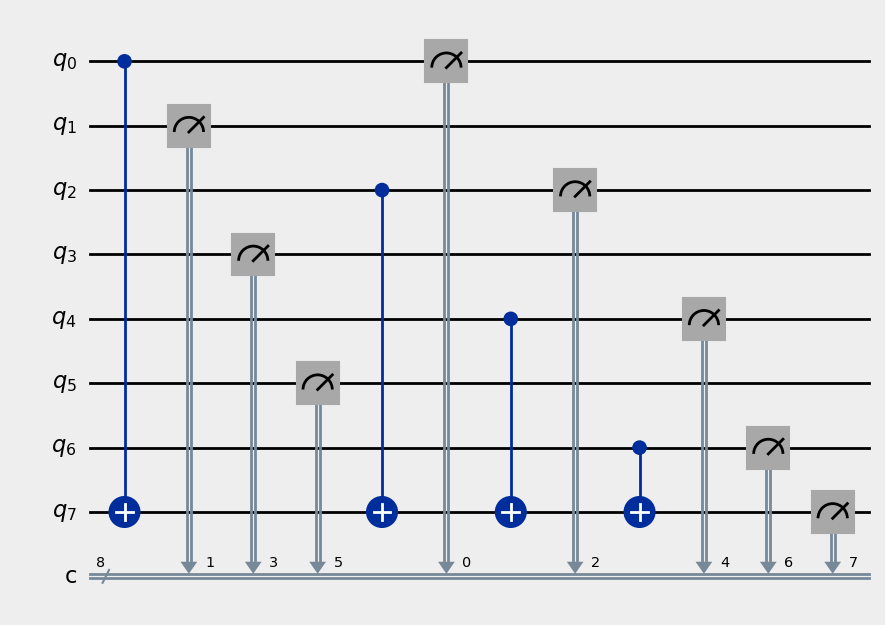

In [56]:
circ = QCircuit([
    CNOT(0, 7), 
    CNOT(2, 7), 
    CNOT(4, 7), 
    CNOT(6, 7),
    BasisMeasure([0, 1, 2, 3, 4, 5, 6, 7])
    ])
circ.display()

# f_u with u = 1010101

Write a Python function that given $u=u_{n-1}\dots u_0$ will creates the Quantum Circuit implementing the gate $U_{f_u}$. 

You can use define $u$ as a sting $u='u_{n-1}\dots u_0'$ and use the Python command: 
```Python 
enumerate
```

In [57]:
def Ufu(u):
    n = len(u)
    circuit = QCircuit(n+1)
    for i, char in enumerate(reversed(u)): # reverse to turn u0..un-1 into un-1...u0
        if char == "1":
            circuit.add(CNOT(i, n))
    return circuit

Ufu("1101").pretty_print()

QCircuit : Size (Qubits, Cbits) = (5, 0), Nb instructions = 3
                    
q_0: ──■────────────
       │            
q_1: ──┼────────────
       │            
q_2: ──┼────■───────
       │    │       
q_3: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘


### Bernstein-Vazirani Circuit

Here is the circuit of Benrstein-Vazirani's algorithm that allows you to find $u$ by only computing once the function $f_u$.

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/vazirani.png'  width="330px" />    
    </tr>
</table>


Implement Bernstein-Vazirani's algorithm such as, the function $f_u$ is defined by the choice of $u=u_{n-1}\dots u_0$ made by the user and the circuit and measurementsof the circuit are automatically created from the knowledge of $u$.

Test your algorithm on the simulator.

In [58]:
def bern_vaz(u):
    k = len(u)
    final_circuit = QCircuit()
    before_oracle = QCircuit(k+1)
    before_oracle.add(X(k))

    for i in range(k+1):
        before_oracle.add(H(i))

    final_circuit = before_oracle + Ufu(u)

    for i in range(k):
        final_circuit.add(H(i))

    final_circuit.add(BasisMeasure([j for j in range(k)]))

    return final_circuit

# We choose $u=110101$

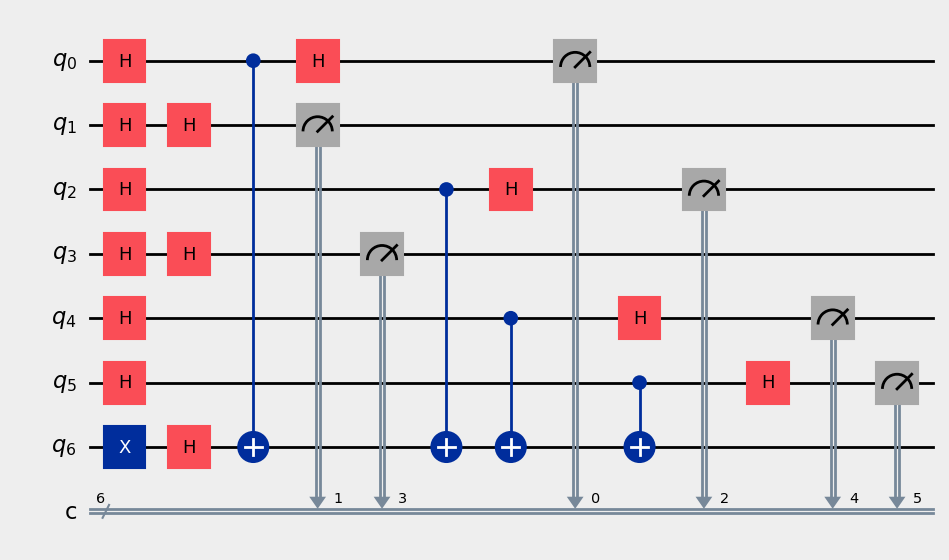

In [59]:
result = bern_vaz("110101")
result.display()

## Test 0 on "perfect" device

In [60]:
print(run(result, IBMDevice.AER_SIMULATOR))

Result: IBMDevice, AER_SIMULATOR
  Counts: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Probabilities: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  Samples:
    State: 0101011, Index: 43, Count: 1024, Probability: 1
  Error: None


## Test 1 on a simulated device

In [61]:
print(run(result, [IBMSimulatedDevice.FakeAlgiers, IBMSimulatedDevice.FakeBrisbane, IBMSimulatedDevice.FakeGeneva]))

BatchResult: 3 results
    Result: circuit 1, IBMSimulatedDevice, FakeAlgiers
      Counts: [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 11, 0, 0, 0, 0, 11, 26, 33, 908, 0, 0, 1, 11, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
      Probabilities: [0.00195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00195, 0.00879, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00293, 0, 0.00195, 0.01074, 0, 0, 0, 0, 0.01074, 0.02539, 0.03223, 0.88672, 0, 0, 0.00098, 0.01074, 0, 0, 0, 0.00098, 0, 0, 0, 0, 0, 0, 0, 0.00391, 0, 0, 0, 0]
      Samples:
        State: 0000000, Index: 0, Count: 2, Probability: 0.0019531
        State: 0001010, Index: 10, Count: 2, Probability: 0.0019531
        State: 0001011, Index: 11, Count: 9, Probability: 0.0087891
        State: 0100000, Index: 32, Count: 3, Probability: 0.0029297
        State: 0100010, Index: 34, Count: 2, Probability: 0.0019531
        State: 0100011, Index: 35, Count: 11, Probabilit

### Results :

- **FakeAlgiers** State: 0101011, Index: 43, Count: 925, Probability: 0.9033203

- **FakeBrisbane** State: 0101011, Index: 43, Count: 939, Probability: 0.9169922

- **FakeGeneva** State: 0101011, Index: 43, Count: 869, Probability: 0.8486328

Test your code on a real quantum device.

In [62]:
#job_id, job = submit(result, IBMDevice.IBM_LEAST_BUSY)

#Commented out so that it won't submit each time I run the code

In [63]:
#print(job.status)

In [64]:
job_id = "d15dvnemya70008esv5g" # taken from ibm quantum dashboard

In [65]:
real_device_result = get_remote_result(job_id, IBMDevice.IBM_BRISBANE) # had do check my IBM Quantum Platform dashboard to find out which one was the "least busy device"
print(real_device_result)

Result: IBMDevice, IBM_BRISBANE
  Counts: [2, 2, 1, 10, 0, 0, 0, 0, 1, 3, 2, 31, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 4, 220, 0, 0, 0, 2, 14, 19, 8, 684, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0]
  Probabilities: [0.00195, 0.00195, 0.00098, 0.00977, 0, 0, 0, 0, 0.00098, 0.00293, 0.00195, 0.03027, 0, 0, 0, 0, 0.00098, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00098, 0.00684, 0.00391, 0.21484, 0, 0, 0, 0.00195, 0.01367, 0.01855, 0.00781, 0.66797, 0, 0.00098, 0, 0.00293, 0, 0, 0, 0.00293, 0, 0, 0, 0, 0, 0, 0.00098, 0.00391, 0, 0, 0, 0]
  Samples:
    State: 000000, Index: 0, Count: 2, Probability: 0.0019531
    State: 000001, Index: 1, Count: 2, Probability: 0.0019531
    State: 000010, Index: 2, Count: 1, Probability: 0.0009766
    State: 000011, Index: 3, Count: 10, Probability: 0.0097656
    State: 001000, Index: 8, Count: 1, Probability: 0.0009766
    State: 001001, Index: 9, Count: 3, Probability: 0.0029297
    State: 001010, Index:

### Results :


- **ibm_brisbane** State: 101011, Index: 43, Count: 684, Probability: 0.6679688


## I overrode the MPQP Result.plot method so that I could make the plot a bit bigger as we couldn't really see the result states very well


In [66]:
def patched_plot(self, show: bool = True):
        """Extract sampling info from the result and construct the bar diagram
        plot.

        Args:
            show: ``plt.show()`` is only executed if ``show``, useful to batch
                plots.
        """
        from matplotlib import pyplot as plt

        if show:
            plt.figure(figsize=(30, 10))

        x_array, y_array = self._to_display_lists()
        x_axis = range(len(x_array))

        plt.bar(x_axis, y_array, color='b')
        plt.xticks(x_axis, x_array, rotation=-60)
        plt.xlabel("State")
        plt.ylabel("Counts")
        device = self.job.device
        # changed the title when I was testing things (differenciate it between many graphs)
        plt.title(f"Overriden by Ali: {self.job.circuit.label}, {type(device).__name__}\n{device.name}") 

        if show:
            plt.show()

import types
real_device_result.plot = types.MethodType(patched_plot, real_device_result)

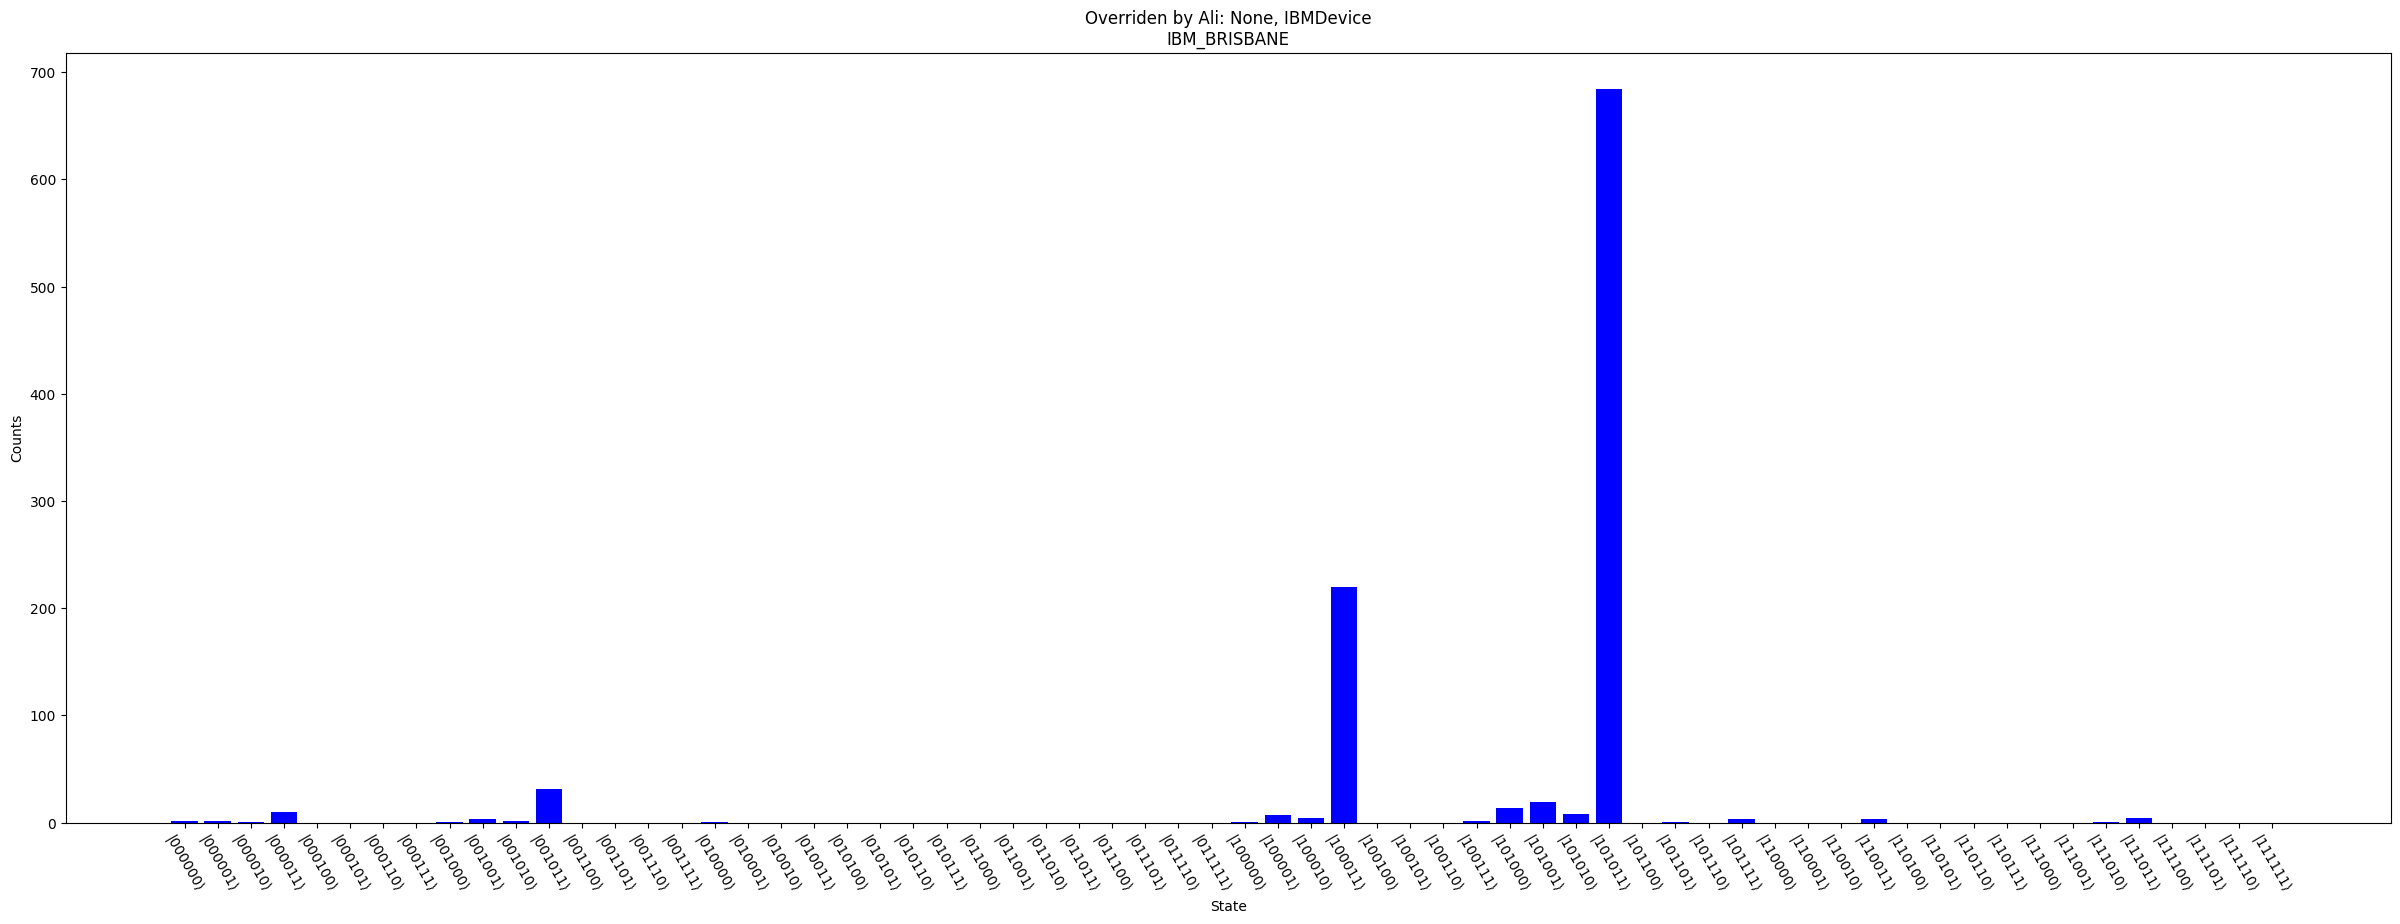

In [67]:
real_device_result.plot()

## Conclusion:

#### We expected $|101011\rangle$, and the correct result was found everytime with the highest probabiliy. It corresponds to our chosen $u=110101$ (reversed)

-----

## Grover's algorithm

Grover's algorithm is based on two gates, the oracle and the diffusion gate.
We will implement Grover's algorithm for a three-qubit system.


### The oracle

Consider the following circuit:


<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/oracle_3qbt.png'  width="330px" />    
    </tr>
</table>

Check that this oracle signs the element $|111>$.
How can you modify if so it signs the element $|101>$ ?

### Proof

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/ali/show_sign.jpg'  alt="screenshot proof |111> signing" width="600px" />    
    </tr>
</table>

### In order to sign the $|101\rangle$ element, we could replace the TOFFOLI gate with a CNOT(0, 2).

### But in order to stay in the context of Grover's algorithm, we can apply X gates to $q_1$ before the first Hadamard, and then after the second Hadamard.

### Proofs

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/ali/proof_101.jpg'  alt="screenshot proof |111> signing" width="600px" />    
    </tr>
</table>

### The diffusion operator

Check that the following circuit corresponds to a CCZ gate i.e. a Control-control $Z$ gate:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/CCZ.png'  width="330px" />    
    </tr>
</table>

The corresponding matrix is 

$$CCZ=\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 &-1\\
\end{pmatrix}$$

And thus the circuit

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/diffusion1.png'  width="330px" />    
    </tr>
</table>

corresponds to $-(2|0><0|-I_8)$, i.e.

$$CCZ=-\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 &0\\
0 & -1 & 0 & 0 & 0 & 0 & 0 &0\\
0 & 0 & -1 & 0 & 0 & 0 & 0 &0\\
0 & 0 & 0 & -1 & 0 & 0 & 0 &0\\
0 & 0 & 0 & 0 & -1 & 0 & 0 &0\\
0 & 0 & 0 & 0 & 0 & -1 & 0 &0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 &0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 &-1\\
\end{pmatrix}$$

Conclude that the diffusion operator, as explained in the lecture, is given by:

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/diffusion.png'  width="330px" />    
    </tr>
</table>



### $CCZ(|111\rangle) = -|111\rangle$ -> this is the result we found earlier. Thus, the circuit corresponds to a CCZ gate.

### Proofs

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='img/ali/matrix.jpg'  alt="screenshot proof |111> signing2" width="600px" />    
    </tr>
</table>

### As we can see, the only state that gets flipped by CCZ is $|111\rangle$

In [88]:
def grover_d(n):
    c = QCircuit(n)

    for i in range(n):
        c.add(H(i))

    for i in range(n):
        c.add(X(i))

    ctrl1 = n - 3
    ctrl2 = n - 2
    target = n - 1

    c.add(H(target))
    c.add(TOF([ctrl1, ctrl2], target))
    c.add(H(target))

    for i in range(n):
        c.add(X(i))

    for i in range(n):
        c.add(H(i))

    return c

In [95]:
c = grover_d(3)
#c.add([X(0), X(1), X(2)])
c.add(BasisMeasure([0, 1, 2]))

result3 = run(c, IBMDevice.AER_SIMULATOR)

print(c)
print(result3)

     ┌───┐┌───┐          ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════╩══╩══╩═
                                         0  1  2 
Result: IBMDevice, AER_SIMULATOR
  Counts: [599, 70, 56, 62, 69, 54, 62, 52]
  Probabilities: [0.58496, 0.06836, 0.05469, 0.06055, 0.06738, 0.05273, 0.06055, 0.05078]
  Samples:
    State: 000, Index: 0, Count: 599, Probability: 0.5849609
    State: 001, Index: 1, Count: 70, Probability: 0.0683594
    State: 010, Index: 2, Count: 56, Probability: 0.0546875
    State: 011, Index: 3, Count: 62, Probability: 0.0605469
    State: 100, Index: 4, Count: 69, Probability: 0.0673828
    State: 101, Index: 5, Count: 54, Probability: 0.0527344
    State: 

### Implement Grover algorithm

Based on the previous question, implement grover's algorithm for $x_0=|101>$ and run it on the simulator and the IBM Quantum Experience

In [165]:
# First we need the oracle that flips |101>

def oracle_101():
    circuit = QCircuit(3)
    circuit.add(X(1))
    circuit.add(H(2))
    circuit.add(TOF([0, 1], 2))
    circuit.add(H(2))
    circuit.add(X(1))
    return circuit

## Simulation

In [166]:
# 1 iteration
grover_circuit = QCircuit(3)
grover_circuit.add([H(0), H(1), H(2)])
O = oracle_101()
D = grover_d(3)

grover_1 = grover_circuit + O + D
grover_1.add(BasisMeasure([0, 1, 2]))

result_1 = run(grover_1, IBMDevice.AER_SIMULATOR)
print(result_1)
grover_1.pretty_print()

Result: IBMDevice, AER_SIMULATOR
  Counts: [35, 39, 30, 37, 22, 787, 39, 35]
  Probabilities: [0.03418, 0.03809, 0.0293, 0.03613, 0.02148, 0.76855, 0.03809, 0.03418]
  Samples:
    State: 000, Index: 0, Count: 35, Probability: 0.0341797
    State: 001, Index: 1, Count: 39, Probability: 0.0380859
    State: 010, Index: 2, Count: 30, Probability: 0.0292969
    State: 011, Index: 3, Count: 37, Probability: 0.0361328
    State: 100, Index: 4, Count: 22, Probability: 0.0214844
    State: 101, Index: 5, Count: 787, Probability: 0.7685547
    State: 110, Index: 6, Count: 39, Probability: 0.0380859
    State: 111, Index: 7, Count: 35, Probability: 0.0341797
  Error: None
QCircuit : Size (Qubits, Cbits) = (3, 3), Nb instructions = 24
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├

### State: 101, Index: 5, Count: 787, Probability: 0.7685547

In [245]:
# optimal amount of tries 
import numpy as np

optimal = int(np.floor((np.pi/4)*np.sqrt(8)))


Result: IBMDevice, AER_SIMULATOR
  Counts: [5, 11, 6, 10, 7, 966, 11, 8]
  Probabilities: [0.00488, 0.01074, 0.00586, 0.00977, 0.00684, 0.94336, 0.01074, 0.00781]
  Samples:
    State: 000, Index: 0, Count: 5, Probability: 0.0048828
    State: 001, Index: 1, Count: 11, Probability: 0.0107422
    State: 010, Index: 2, Count: 6, Probability: 0.0058594
    State: 011, Index: 3, Count: 10, Probability: 0.0097656
    State: 100, Index: 4, Count: 7, Probability: 0.0068359
    State: 101, Index: 5, Count: 966, Probability: 0.9433594
    State: 110, Index: 6, Count: 11, Probability: 0.0107422
    State: 111, Index: 7, Count: 8, Probability: 0.0078125
  Error: None


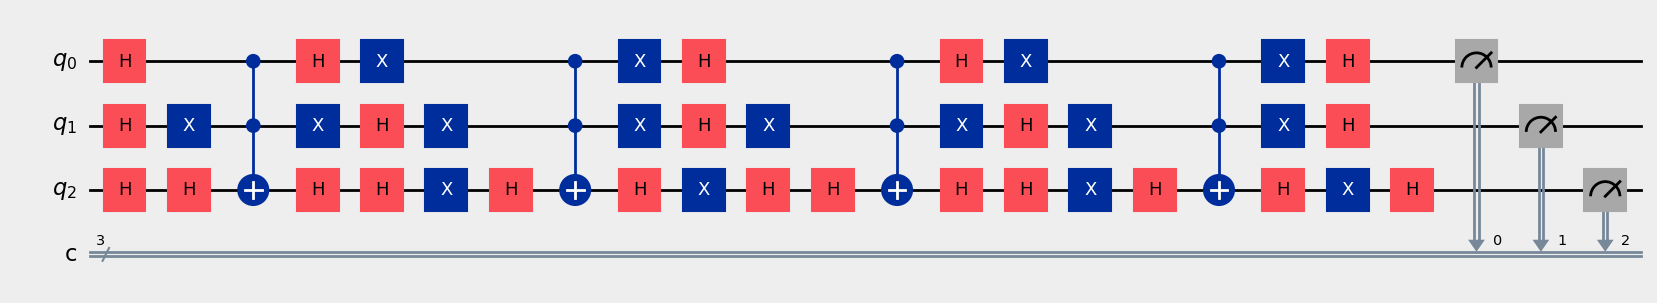

In [248]:
# 2 iterations

grover_3 = QCircuit(3)
grover_3.add([H(0), H(1), H(2)])

for _ in range(optimal):
    grover_3 += O + D

grover_3.add(BasisMeasure([0, 1, 2]))


result_3 = run(grover_3, IBMDevice.AER_SIMULATOR)
print(result_3)
grover_3.display()


### State: 101, Index: 5, Count: 1024, Probability: 1

In [ ]:
job_id3, job3 = submit(grover_3, IBMDevice.IBM_LEAST_BUSY)

/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:919: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


In [250]:
print(job.status())

JobStatus.DONE


In [251]:
result = get_remote_result(job_id3, IBMDevice.IBM_BRISBANE)

In [252]:
print(result)

Result: IBMDevice, IBM_BRISBANE
  Counts: [84, 66, 98, 127, 70, 412, 81, 86]
  Probabilities: [0.08203, 0.06445, 0.0957, 0.12402, 0.06836, 0.40234, 0.0791, 0.08398]
  Samples:
    State: 000, Index: 0, Count: 84, Probability: 0.0820312
    State: 001, Index: 1, Count: 66, Probability: 0.0644531
    State: 010, Index: 2, Count: 98, Probability: 0.0957031
    State: 011, Index: 3, Count: 127, Probability: 0.1240234
    State: 100, Index: 4, Count: 70, Probability: 0.0683594
    State: 101, Index: 5, Count: 412, Probability: 0.4023438
    State: 110, Index: 6, Count: 81, Probability: 0.0791016
    State: 111, Index: 7, Count: 86, Probability: 0.0839844
  Error: None


## Exercises

### Exercise 1

Write a Qiksit Script that implement Grover's algorithm for a given 3 qubit states $|x_2x_1x_0>$.

### Exercise 2

How would you implement Grover's algorithm for 4 qubits ?


### Exercise 1

In [170]:
from qiskit import QuantumCircuit, QuantumRegister, transpiler, assemble

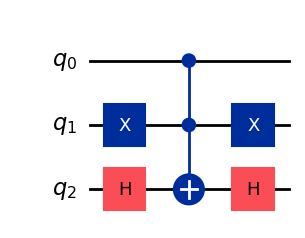

In [319]:
def oracle(tar):
    qc = QuantumCircuit(3)
    for i, bit in enumerate(reversed(tar)):
        if bit == "0":
            qc.x(i)
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)

    for i, bit in enumerate(reversed(tar)):
        if bit == "0":
            qc.x(i)
    return qc

o = oracle("101")
o.draw("mpl")

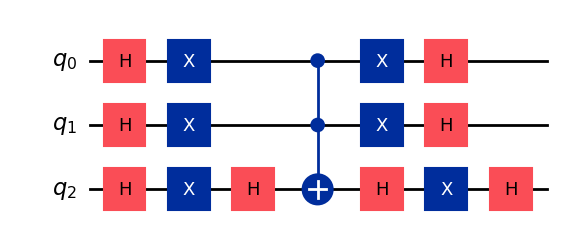

In [254]:
def diffuser():
    qc = QuantumCircuit(3)
    for i in range(3):
        qc.h(i)
        qc.x(i)
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)

    for i in range(3):
        qc.x(i)
        qc.h(i)

    return qc

d = diffuser()

d.draw("mpl")

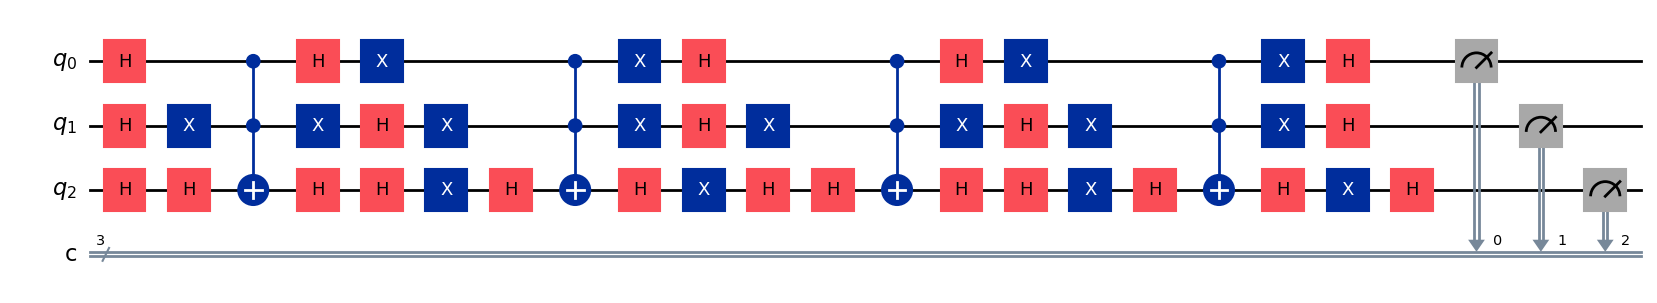

In [282]:
def grover_circuit(target, iterations = int(np.floor((np.pi/4)*np.sqrt(8)))):
    qc = QuantumCircuit(3, 3)

    qc.h([0, 1, 2])

    # Step 2: Grover iterations
    for _ in range(iterations):
        qc.compose(oracle(target), inplace=True)
        qc.compose(diffuser(), inplace=True)

    qc.measure([0, 1, 2], [0, 1, 2])
    return qc

test = grover_circuit("101")
test.draw("mpl")



In [292]:
from qiskit_aer import Aer
from qiskit import transpile

simulator = Aer.get_backend("qasm_simulator")
compiled_circuit = transpile(test, simulator)
job = simulator.run(compiled_circuit, backend=simulator, shots=1024)

result = job.result()
counts = result.get_counts(test)

print(counts)


total = sum(counts.values())
prob_0 = sum(v for k, v in counts.items() if k == '101') / total

from IPython.display import display, Math 
display(Math(f"P(|q_3\\rangle \\rightsquigarrow |0\\rangle) = {prob_0}"))

{'110': 6, '000': 6, '010': 8, '111': 8, '011': 6, '100': 10, '001': 6, '101': 974}


<IPython.core.display.Math object>

# Exercice 2

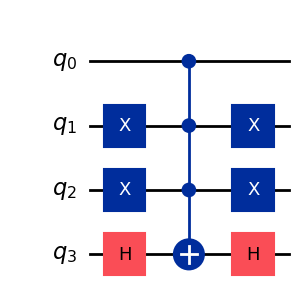

In [335]:
def oracle(tar):
    n = len(tar)
    qc = QuantumCircuit(n)
    for i, bit in enumerate(reversed(tar)):
        if bit == "0":
            qc.x(i)

    qc.h(n-1)
    qc.mcx([k for k in range(n-1)], n-1)
    qc.h(n-1)

    for i, bit in enumerate(reversed(tar)):
        if bit == "0":
            qc.x(i)
    return qc


o = oracle("1001")
o.draw("mpl")

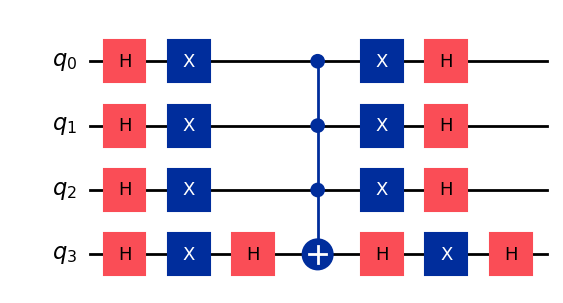

In [337]:
def diffuser(n):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.h(i)
        qc.x(i)
    qc.h(n-1)
    qc.mcx([k for k in range(n-1)], n-1)
    qc.h(n-1)

    for i in range(n):
        qc.x(i)
        qc.h(i)

    return qc

d = diffuser(4)

d.draw("mpl")

In [351]:
def grover_circuit(target, iterations = int(np.floor((np.pi / 4) * np.sqrt(2 ** n)))):
    n = len(target)

    qc = QuantumCircuit(n, n)
    qc.h(range(n))

    for _ in range(iterations):
        qc.compose(oracle(target), inplace=True)
        qc.compose(diffuser(n), inplace=True)

    qc.measure(range(n), range(n))
    return qc

In [352]:
four_qubits = grover_circuit("1001")

In [359]:
simulator = Aer.get_backend("qasm_simulator")
compiled_circuit = transpile(four_qubits, simulator)
job = simulator.run(compiled_circuit, backend=simulator, shots=1024)

result = job.result()
counts = result.get_counts(four_qubits)

print(counts)


total = sum(counts.values())
prob_0 = sum(v for k, v in counts.items() if k == '1001') / total

from IPython.display import display, Math 
display(Math(f"P(|q\\rangle \\rightsquigarrow |1001\\rangle) = {prob_0}"))

{'1011': 11, '0110': 6, '1000': 7, '1100': 6, '0100': 5, '1111': 7, '0001': 6, '1110': 3, '1001': 934, '0101': 5, '0010': 5, '0000': 3, '1101': 6, '0011': 3, '0111': 5, '1010': 12}


<IPython.core.display.Math object>